<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/M_Piramu_Unsupervised_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Concept         | Meaning                                                             |
| --------------- | ------------------------------------------------------------------- |
| Eigenvalue (λ)  | Amount of stretching/compression                                    |
| Eigenvector (v) | Direction of stretching                                             |
| Role in PCA     | Find the most informative directions in data (principal components) |




Eigenvalues and eigenvectors are fundamental concepts in linear algebra used to understand the behavior of linear transformations. Given a square matrix A, an eigenvector v is a non-zero vector that, when multiplied by A, results in a scaled version of itself, i.e., A⋅v=λ⋅v, where λ is the corresponding eigenvalue. Eigenvectors represent directions, and eigenvalues indicate the magnitude of stretching or shrinking along those directions. In Principal Component Analysis (PCA), these concepts are crucial: PCA computes the eigenvectors and eigenvalues of the covariance matrix of the dataset. The eigenvectors (called principal components) define the new feature space, while eigenvalues indicate the amount of variance captured by each component. By selecting the top eigenvectors with the largest eigenvalues, PCA reduces the dimensionality of data while preserving as much variance as possible, making it useful for data compression and visualization.

In [26]:
#b)	Use the Students' Social Network Profile Clustering dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab.
#import library and upload dataset

import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('/content/Clustering_Marketing.csv')

# Display first few rows
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [27]:
#Data Summary and info
# Dataset shape
print("Shape:", df.shape)

# Basic info
df.info()

# Summary statistics
df.describe()


Shape: (15000, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot         

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,...,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


In [24]:
# Check for Missing Values
# Missing values
print(df.isnull().sum())


gradyear           15000
gender             15000
age                15000
NumberOffriends    15000
basketball         15000
football           15000
soccer             15000
softball           15000
volleyball         15000
swimming           15000
cheerleading       15000
baseball           15000
tennis             15000
sports             15000
cute               15000
sex                15000
sexy               15000
hot                15000
kissed             15000
dance              15000
band               15000
marching           15000
music              15000
rock               15000
god                15000
church             15000
jesus              15000
bible              15000
hair               15000
dress              15000
blonde             15000
mall               15000
shopping           15000
clothes            15000
hollister          15000
abercrombie        15000
die                15000
death              15000
drunk              15000
drugs              15000


/tmp/ipython-input-28-2347738355.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


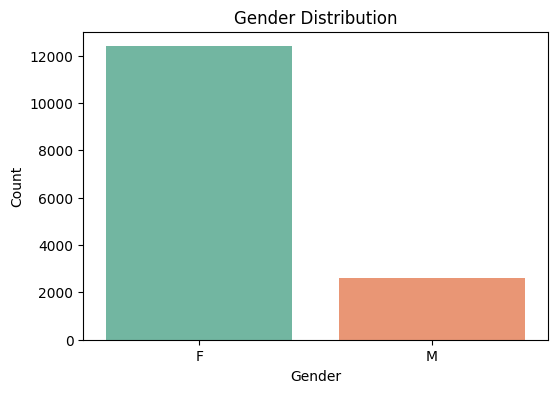

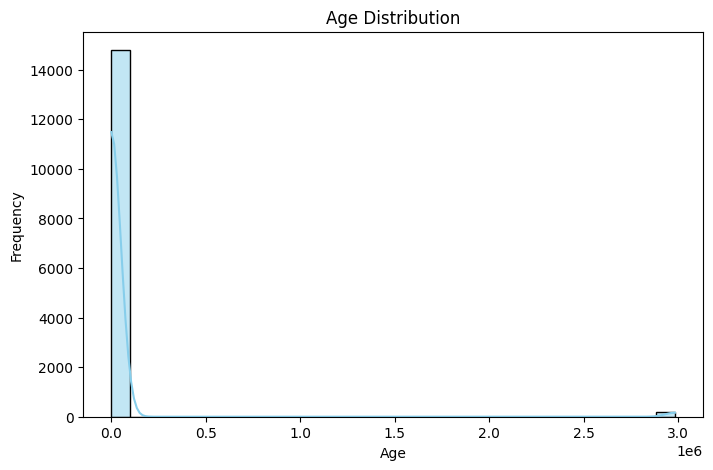

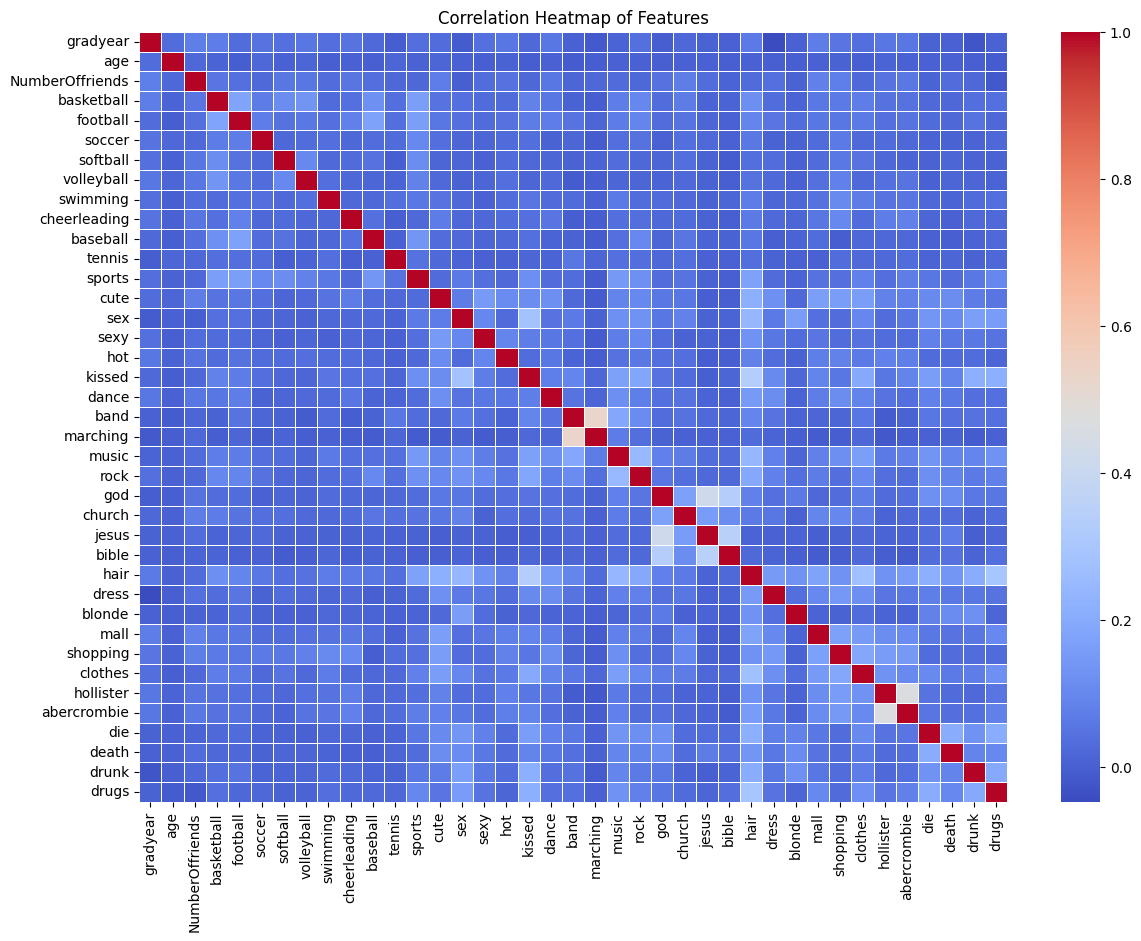

In [28]:
# ii EDA and Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# 3. Convert 'age' to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# 4. Handle Missing Values
df['age'].fillna(df['age'].median(), inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

# 5. Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 6. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 7. Correlation Heatmap (excluding 'gender')
plt.figure(figsize=(14,10))
sns.heatmap(df.drop(columns=['gender']).corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Top 10 most skewed features:
 blonde      117.250830
sex          49.972125
bible        21.417635
jesus        19.160195
swimming     16.380904
kissed       12.866542
drugs        12.508258
marching     11.670519
god          11.490218
tennis       11.236150
dtype: float64


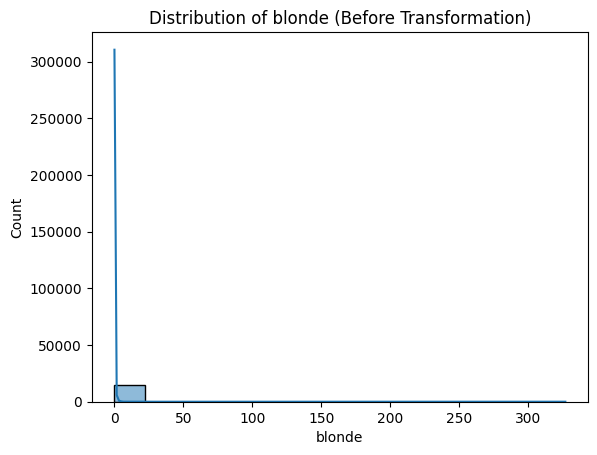

In [29]:
#iii.	Check the distributions/skewness in the variables and do the transformations if required.
import numpy as np
import pandas as pd

# Drop non-numeric columns like 'gender'
numeric_df = df.drop(columns=['gender']).select_dtypes(include=[np.number])

# Calculate skewness
skew_values = numeric_df.skew().sort_values(ascending=False)
print("Top 10 most skewed features:\n", skew_values.head(10))

# Visualize distribution (optional)
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing most skewed feature
top_skewed = skew_values.index[0]
sns.histplot(df[top_skewed], kde=True)
plt.title(f'Distribution of {top_skewed} (Before Transformation)')
plt.show()
